<a href="https://colab.research.google.com/github/mighty-mass/ai-engineer-course/blob/main/ML%20Models/TropicTaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione di frutti esotici
TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche.

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi.

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà:

- Migliorare l'Efficienza Operativa: Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
- Ridurre gli Errori Umani: Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
- Ottimizzare l'Inventario: Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
- Aumentare la Soddisfazione del Cliente: Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.

Dettagli del Progetto:

**Dataset**: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
Algoritmo: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione.

**Output**: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.
Requisiti del Progetto:

**Preparazione del Dataset**:
1. Caricamento e preprocessamento dei dati sui frutti esotici.
2. Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.
3.  Implementazione del Modello KNN:
  - Sviluppo e addestramento del modello KNN.
  - Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.
4. Valutazione delle Performance:
  - Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
  - Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.
5. Visualizzazione dei Risultati:
  - Creazione di grafici per visualizzare e confrontare le performance del modello.
  - Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.

# Variabili del Dataset
Il dataset è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

Contiene le seguenti variabili:

- Frutto: Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
- Peso (g): Il peso del frutto in grammi. Variabile continua.
- Diametro medio (mm): Il diametro medio del frutto in millimetri. Variabile continua.
- Lunghezza media (mm): La lunghezza media del frutto in millimetri. Variabile continua.
- Durezza buccia (1-10): La durezza della buccia del frutto su una scala da 1 a 10. Variabile continua.
- Dolcezza (1-10): La dolcezza del frutto su una scala da 1 a 10. Variabile continua.
- Acidità (1-10): L'acidità del frutto su una scala da 1 a 10. Variabile continua.

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili.

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
CSV_URL_PATH = "https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv"


In [269]:
df = pd.read_csv(CSV_URL_PATH)

CSV_COLUMNS = ['Frutto', 'Peso (g)', 'Diametro medio (mm)', 'Lunghezza media (mm)',
       'Durezza buccia (1-10)', 'Dolcezza (1-10)']

RENAME_COLUMNS = ['frutto','peso','diametro','dimensione','durezza_buccia', 'dolcezza']

df.rename(columns=dict(zip(CSV_COLUMNS, RENAME_COLUMNS)), inplace=True)

df

,frutto,peso,diametro,dimensione,durezza_buccia,dolcezza
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88
...,...,...,...,...,...,...
495,Kiwi,40.82,67.52,7.39,7.28,5.56
496,Kiwi,54.65,62.95,7.06,6.47,4.68
497,Kiwi,35.70,71.43,7.64,9.75,4.36
498,Kiwi,30.80,65.23,5.91,7.65,4.13


Non abbiamo valori nulli, possiamo saltare il prepocessing per i valori nulli

In [270]:
missing_values = df.isnull().sum()
missing_values

,0
frutto,0
peso,0
diametro,0
dimensione,0
durezza_buccia,0
dolcezza,0


Visualizziamo le distribuzini per ogni categoria

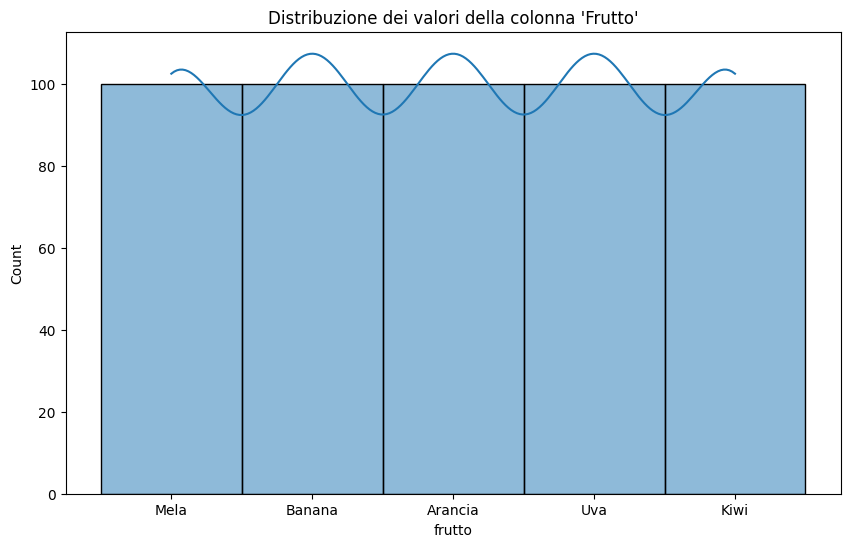

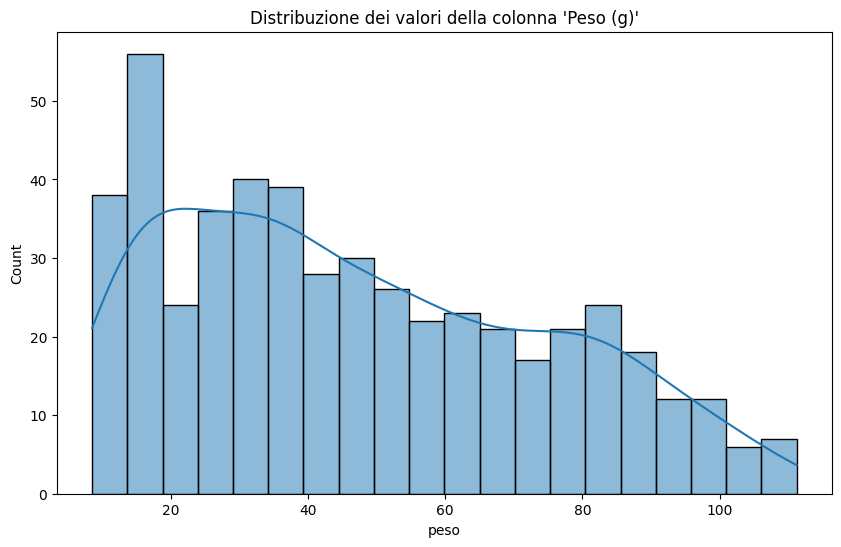

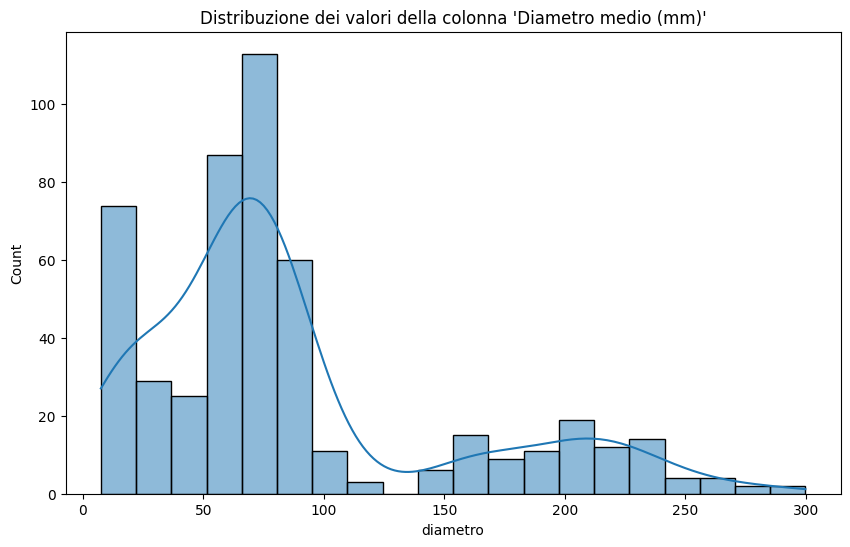

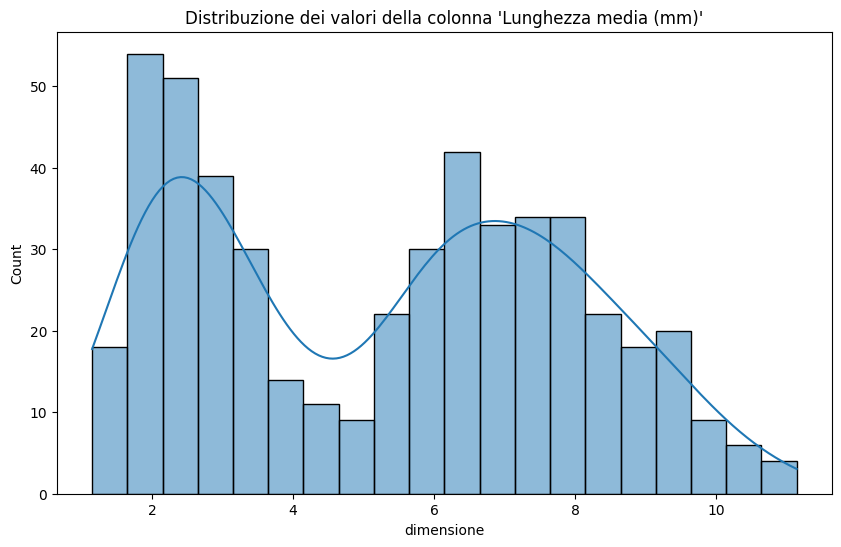

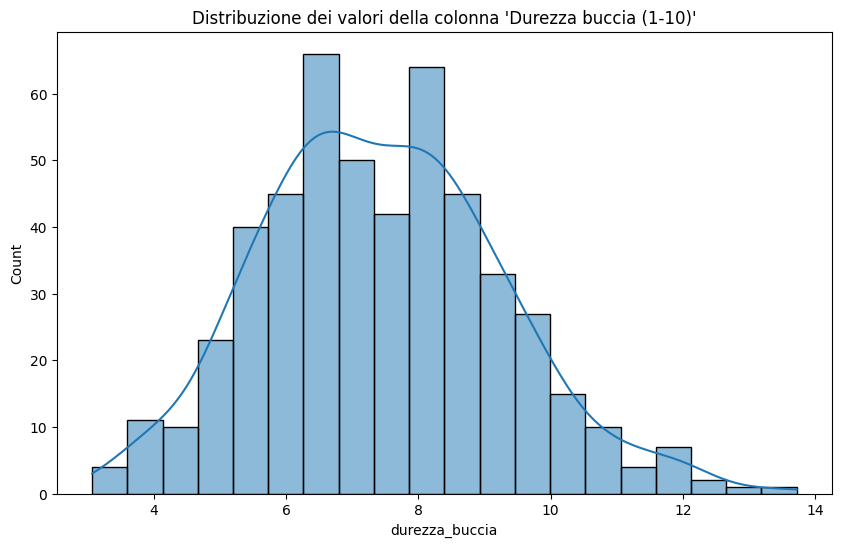

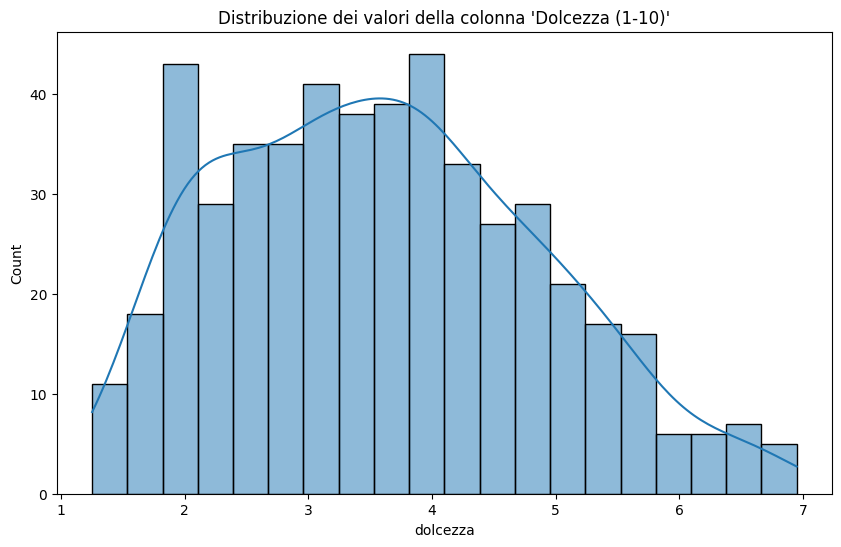

In [271]:
for col_show, col_name in dict(zip(CSV_COLUMNS, RENAME_COLUMNS)).items():
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col_name], bins=20, kde=True)
  plt.title(f"Distribuzione dei valori della colonna '{col_show}'")
  plt.show()

Tuttavia, tra i vari grafici possiamo notare che il valore della durezza ha  un problema: diversi valori non rispettano il dominio atteso dei valori

In [272]:
print("Durezza Buccia, dominio dei valori atteso tra 1 e 10")
print(f"Min: {df['durezza_buccia'].min()} Max: {df['durezza_buccia'].max()}")

Durezza Buccia, dominio dei valori atteso tra 1 e 10
Min: 3.07 Max: 13.72


In [273]:
print("Dolcezza, dominio dei valori atteso tra 1 e 10")
print(f"Min: {df['dolcezza'].min()} Max: {df['dolcezza'].max()}")

Dolcezza, dominio dei valori atteso tra 1 e 10
Min: 1.25 Max: 6.95


In [274]:
values_greater_than_10 = (df['durezza_buccia'] > 10).sum()
print(values_greater_than_10)

40


Vediamo per quali frutti abbiamo questo tipo di problema

In [275]:
df[df['durezza_buccia'] > 10]

,frutto,peso,diametro,dimensione,durezza_buccia,dolcezza
48,Mela,100.83,65.58,5.42,10.23,2.36
123,Banana,24.07,152.89,2.32,10.81,1.95
146,Banana,24.85,202.04,1.92,10.12,1.61
149,Banana,41.99,165.74,2.08,12.15,1.84
153,Banana,29.08,148.05,3.77,10.12,2.08
158,Banana,29.30,162.10,3.15,10.24,1.84
159,Banana,31.48,234.54,2.52,11.75,1.49
164,Banana,32.60,183.76,3.43,10.22,1.88
170,Banana,34.21,183.30,2.34,10.74,1.68
175,Banana,24.64,193.76,3.63,13.07,2.08


Vediamo la distribuzione dei valori per i frutti che hanno valori outlier

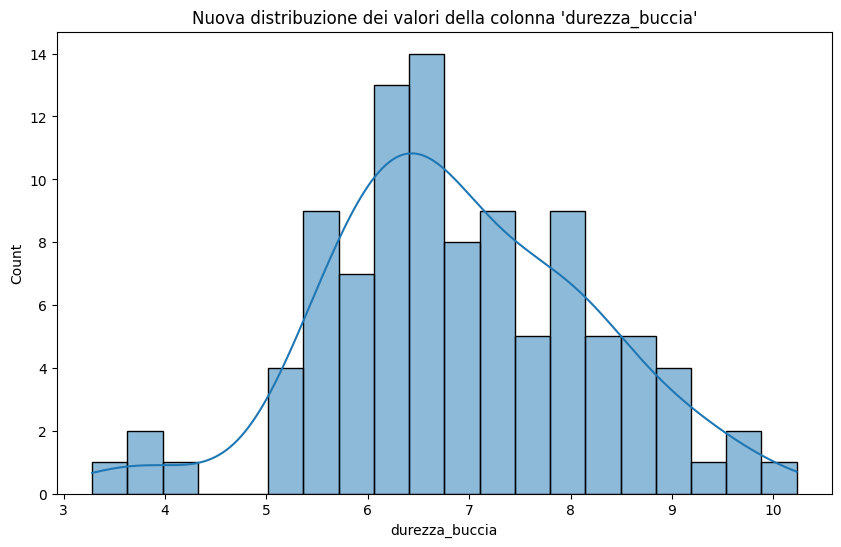

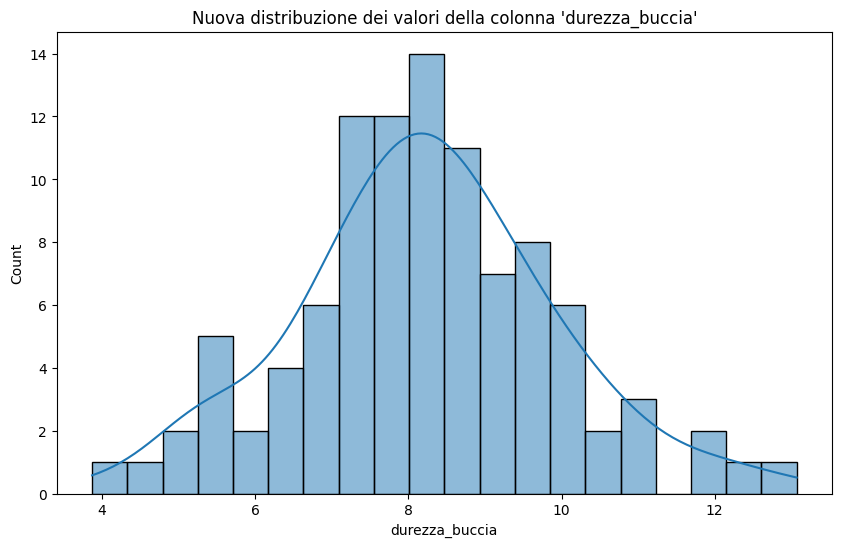

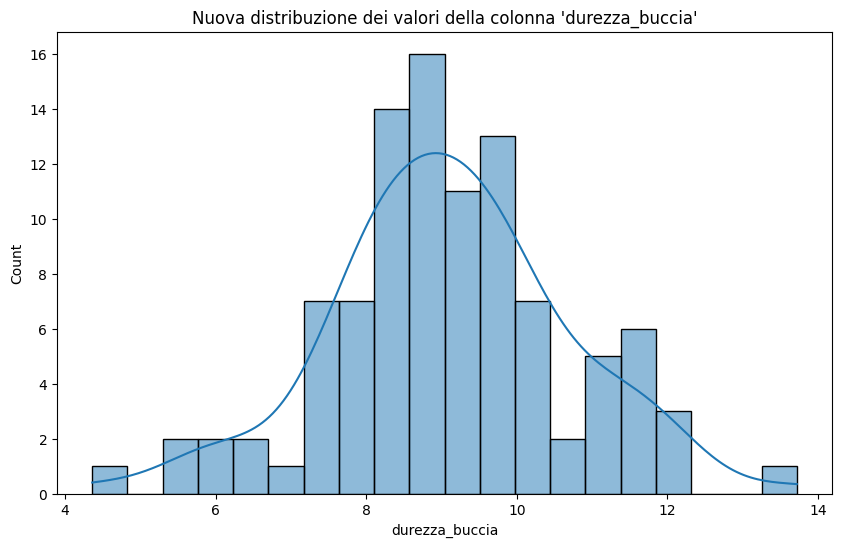

In [276]:
for frutto in ['Mela', 'Banana', 'Uva']:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[df['frutto'] == frutto]["durezza_buccia"], bins=20, kde=True)
  plt.title(f"Nuova distribuzione dei valori della colonna 'durezza_buccia'")
  plt.show()

Vorrei non perdere gli altri valori associati ad ogni frutto, quindi sostituisco i valori outlier con la mediana dei valori di ogni frutto.
Cosi dovrei mantenere l'attuale distribuzione senza introdurre altri errori nella fasi successive. Ho scoperto poi che 'e considerato un metodo soft di riduzione del rumore

In [277]:
# for frutto in ['Mela', 'Banana', 'Uva']:
#   median_value = df[(df['frutto'] == frutto) & (df['durezza_buccia'] <= 10)]['durezza_buccia'].median()
#   df.loc[(df['frutto'] == frutto) & (df['durezza_buccia'] > 10), 'durezza_buccia'] = median_value

# df[df['durezza_buccia'] > 10]

Come alternativa possiamo commentare la parte sopra e decommentare sotto, affidandoci ad una normalizzazione dei dati (metodo hard), rendendo un po' meno interpretabili i risultati reali.
Tuttavia, rimane una scelta migliore che rimuovere gli outlier visto che abbiamo pochi dati e il risultato finale e' diverso ma non in maniera considerevole

In [278]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()  # Resiste agli outlier
df["durezza_buccia"] = scaler.fit_transform(df[["durezza_buccia"]])

Di seguito, abbiamo la conferma che i nuovi valori rientrino nel range che ci si aspetta dalla colonna come indicato dal titolo.

- Tra 1 e 10 se abbiamo applicato la mediana
- Tra -x e +y se abbiamo applicato la normalizzazione

In [279]:
print("Durezza Buccia, dominio dei valori atteso tra 1 e 10")
print(f"Min: {df['durezza_buccia'].min()} Max: {df['durezza_buccia'].max()}")

Durezza Buccia, dominio dei valori atteso tra 1 e 10
Min: -1.7340101522842635 Max: 2.5908629441624367


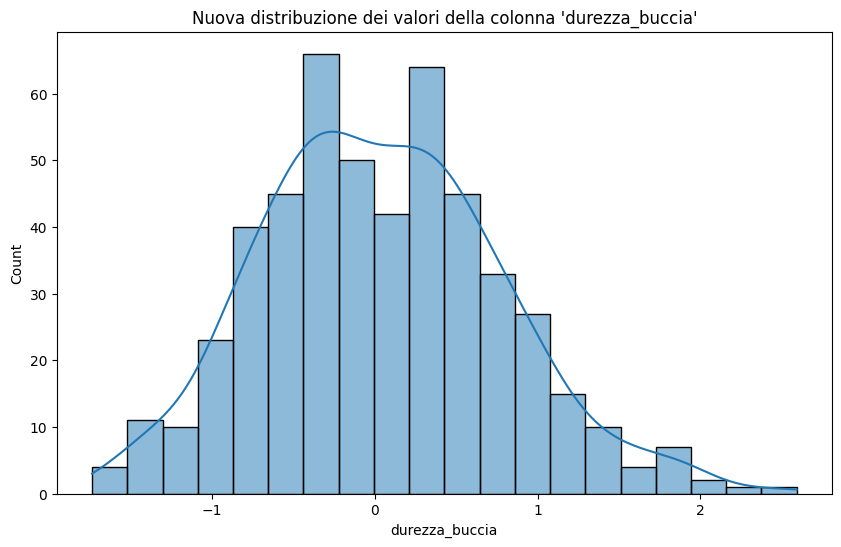

In [280]:
plt.figure(figsize=(10, 6))
sns.histplot(df["durezza_buccia"], bins=20, kde=True)
plt.title(f"Nuova distribuzione dei valori della colonna 'durezza_buccia'")
plt.show()

Prima di predirre il KNN, procediamo a fare l'encoding della variabile frutto

In [281]:
# Encoding della variabile target
df['frutto'] = df['frutto'].astype("category")
category_mapping = dict(enumerate(df["frutto"].cat.categories))
df['frutto'] =  df['frutto'].cat.codes
df

,frutto,peso,diametro,dimensione,durezza_buccia,dolcezza
0,3,86.40,89.68,8.69,0.921827,2.41
1,3,77.58,73.45,6.49,-0.056853,3.87
2,3,81.95,81.66,6.40,0.710660,2.88
3,3,66.33,36.71,6.78,0.353299,2.55
4,3,56.73,75.69,5.78,0.735025,3.88
...,...,...,...,...,...,...
495,2,40.82,67.52,7.39,-0.024365,5.56
496,2,54.65,62.95,7.06,-0.353299,4.68
497,2,35.70,71.43,7.64,0.978680,4.36
498,2,30.80,65.23,5.91,0.125888,4.13


Separiamo i valori da predirre dal dataset

In [282]:
# Separazione features e target
X = df.drop(columns=["frutto"], axis=1)
y = df["frutto"]

Importiamo le metriche necessarie e il relativo Classifier

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix

RANDOM_SEED = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Come per l'esempio del corso, procediamo a predirre l'accuracy e la log loss per ogni K. Ovviamente, non ha senso avere un K gigante (e.g. 100) visto che abbiamo 100 valori per frutto, o al massimo 500 valori in generale (come visto nei grafici all'inizio). Introdurremmo inutilmente del rumore e dovremmo aspettare anche di piu per terminare la computazione.
Dai vari test, in entrmabe le configurazioni per la gestion della durezza delle bucce, il valore che ci interessa e' comunque sotto i 50

In [284]:
Ks = [x for x in range(1,50)]

list_accuracy = {}
list_log_loss = {}

for K in Ks:
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train, y_train)

  y_pred_train = knn.predict(X_train)
  y_proba_train = knn.predict_proba(X_train)

  y_pred_test = knn.predict(X_test)
  y_proba_test = knn.predict_proba(X_test)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  log_train = log_loss(y_train, y_proba_train)
  log_test = log_loss(y_test, y_proba_test)

  print(f"K = {K}")
  print(f"Accuracy: Train = {accuracy_train:.3f} Test = {accuracy_test:.3f}")
  print(f"Log Loss: Train = {log_train:.3f} Test = {log_test:.3f}")

  list_accuracy[K] = accuracy_test
  list_log_loss[K] = log_test

best_k_acc = max(list_accuracy, key=list_accuracy.get)
best_k_log = min(list_log_loss, key=list_log_loss.get)
print(f"Best K for accuracy: {best_k_acc}: Accuracy {list_accuracy[best_k_acc]}, Log Loss {list_log_loss[best_k_acc]}")
print(f"Best K for log loss: {best_k_log}: Accuracy {list_accuracy[best_k_log]}, Log Loss {list_log_loss[best_k_log]}")

K = 1
Accuracy: Train = 1.000 Test = 0.740
Log Loss: Train = 0.000 Test = 9.371
K = 2
Accuracy: Train = 0.912 Test = 0.770
Log Loss: Train = 0.118 Test = 5.192
K = 3
Accuracy: Train = 0.912 Test = 0.760
Log Loss: Train = 0.184 Test = 2.763
K = 4
Accuracy: Train = 0.890 Test = 0.730
Log Loss: Train = 0.210 Test = 2.463
K = 5
Accuracy: Train = 0.882 Test = 0.790
Log Loss: Train = 0.242 Test = 1.428
K = 6
Accuracy: Train = 0.882 Test = 0.770
Log Loss: Train = 0.258 Test = 1.111
K = 7
Accuracy: Train = 0.850 Test = 0.770
Log Loss: Train = 0.289 Test = 1.109
K = 8
Accuracy: Train = 0.853 Test = 0.760
Log Loss: Train = 0.296 Test = 0.762
K = 9
Accuracy: Train = 0.853 Test = 0.780
Log Loss: Train = 0.311 Test = 0.421
K = 10
Accuracy: Train = 0.833 Test = 0.800
Log Loss: Train = 0.329 Test = 0.416
K = 11
Accuracy: Train = 0.840 Test = 0.810
Log Loss: Train = 0.337 Test = 0.399
K = 12
Accuracy: Train = 0.848 Test = 0.810
Log Loss: Train = 0.341 Test = 0.399
K = 13
Accuracy: Train = 0.830 Test =

Risulati basati sul best K per Accuracy

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        21
           1       1.00      1.00      1.00        19
           2       0.76      0.89      0.82        18
           3       0.64      0.53      0.58        17
           4       1.00      1.00      1.00        25

    accuracy                           0.82       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.82      0.82      0.82       100



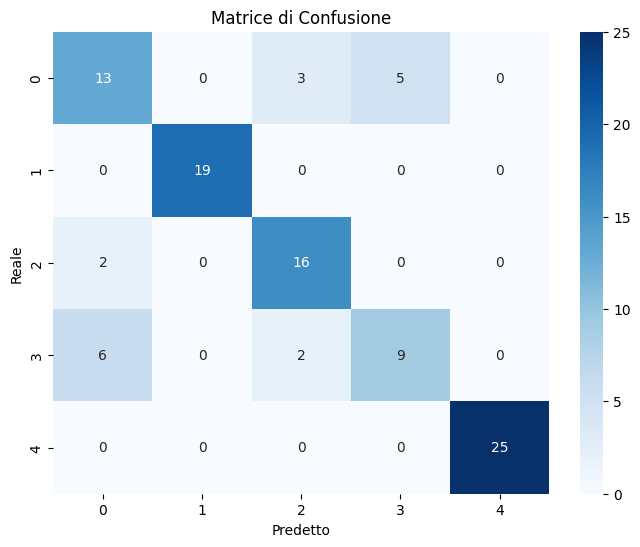

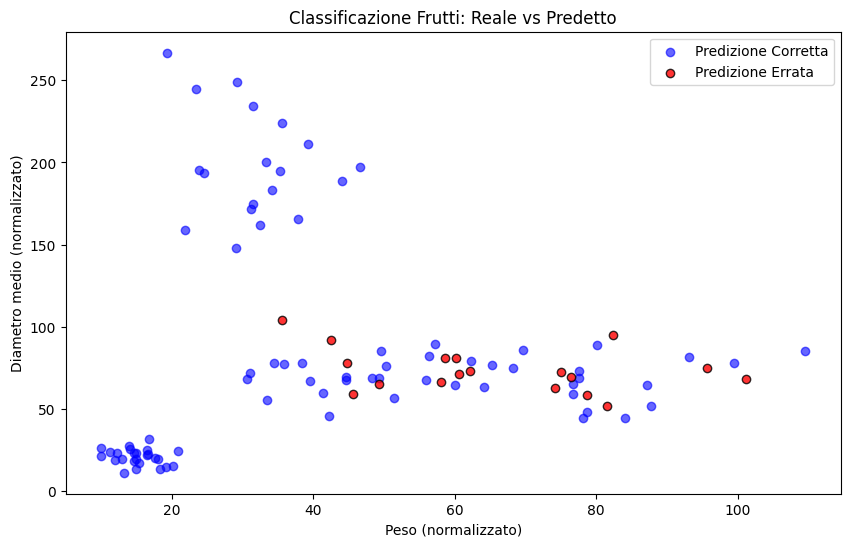

Frutti con più errori di classificazione:
Frutto Reale
Mela       8
Arancia    8
Kiwi       2
Name: count, dtype: int64


In [285]:
knn = KNeighborsClassifier(n_neighbors=best_k_acc)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
log_test = log_loss(y_test, y_proba_test)

print(classification_report(y_test, y_pred_test))

# Matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

# Converti X_test in un array NumPy
X_test_np = np.array(X_test)

# Convertiamo y_test e y_pred in array per l'indicizzazione
y_test = np.array(y_test)
y_pred = np.array(y_pred_test)

# Identifica i punti corretti ed errati
correct = y_test == y_pred
incorrect = y_test != y_pred

# Grafico di dispersione
plt.figure(figsize=(10, 6))

# Punti corretti
plt.scatter(X_test_np[correct, 0], X_test_np[correct, 1], c='blue', label='Predizione Corretta', alpha=0.6)

# Punti errati
plt.scatter(X_test_np[incorrect, 0], X_test_np[incorrect, 1], c='red', label='Predizione Errata', alpha=0.8, edgecolors='black')

plt.xlabel("Peso (normalizzato)")
plt.ylabel("Diametro medio (normalizzato)")
plt.title("Classificazione Frutti: Reale vs Predetto")
plt.legend()
plt.show()

# Convertiamo y_test e y_pred da numeri a nomi di frutti
y_test_labels = np.array([category_mapping[i] for i in y_test])
y_pred_labels = np.array([category_mapping[i] for i in  y_pred_test])

# Filtriamo le predizioni errate
incorrect_indices = y_test != y_pred
incorrect_real = y_test_labels[incorrect_indices]  # Frutti reali errati
incorrect_pred = y_pred_labels[incorrect_indices]  # Frutti previsti erroneamente

# Creiamo un DataFrame degli errori
error_df = pd.DataFrame({"Frutto Reale": incorrect_real, "Frutto Predetto": incorrect_pred})

# Contiamo gli errori per ogni frutto reale
error_counts = error_df["Frutto Reale"].value_counts()

# Visualizziamo il frutto più difficile da classificare
print("Frutti con più errori di classificazione:")
print(error_counts)

Risulati basati sul best K per Log Loss

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        21
           1       1.00      1.00      1.00        19
           2       0.76      0.89      0.82        18
           3       0.56      0.53      0.55        17
           4       1.00      1.00      1.00        25

    accuracy                           0.80       100
   macro avg       0.78      0.79      0.78       100
weighted avg       0.79      0.80      0.80       100



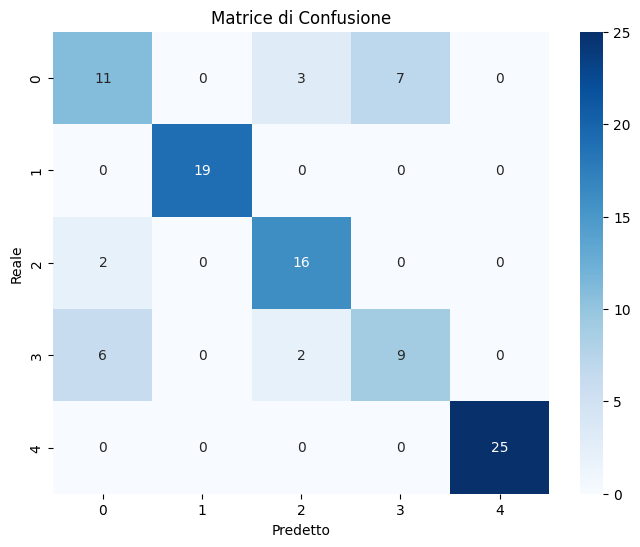

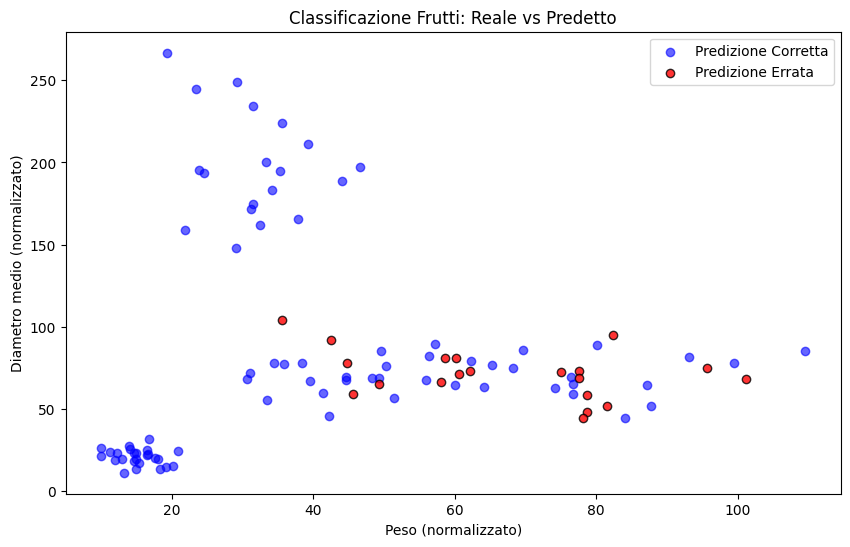

Frutti con più errori di classificazione:
Frutto Reale
Arancia    10
Mela        8
Kiwi        2
Name: count, dtype: int64
Frutti con più errori di classificazione:
Frutto Reale
Arancia    10
Mela        8
Kiwi        2
Name: count, dtype: int64


In [286]:
knn = KNeighborsClassifier(n_neighbors=best_k_log)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
log_test = log_loss(y_test, y_proba_test)

print(classification_report(y_test, y_pred_test))

# Matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

# Converti X_test in un array NumPy
X_test_np = np.array(X_test)

# Convertiamo y_test e y_pred in array per l'indicizzazione
y_test = np.array(y_test)
y_pred = np.array(y_pred_test)

# Identifica i punti corretti ed errati
correct = y_test == y_pred
incorrect = y_test != y_pred

# Grafico di dispersione
plt.figure(figsize=(10, 6))

# Punti corretti
plt.scatter(X_test_np[correct, 0], X_test_np[correct, 1], c='blue', label='Predizione Corretta', alpha=0.6)

# Punti errati
plt.scatter(X_test_np[incorrect, 0], X_test_np[incorrect, 1], c='red', label='Predizione Errata', alpha=0.8, edgecolors='black')

plt.xlabel("Peso (normalizzato)")
plt.ylabel("Diametro medio (normalizzato)")
plt.title("Classificazione Frutti: Reale vs Predetto")
plt.legend()
plt.show()

# Convertiamo y_test e y_pred da numeri a nomi di frutti
y_test_labels = np.array([category_mapping[i] for i in y_test])
y_pred_labels = np.array([category_mapping[i] for i in  y_pred_test])

# Filtriamo le predizioni errate
incorrect_indices = y_test != y_pred
incorrect_real = y_test_labels[incorrect_indices]  # Frutti reali errati
incorrect_pred = y_pred_labels[incorrect_indices]  # Frutti previsti erroneamente

# Creiamo un DataFrame degli errori
error_df = pd.DataFrame({"Frutto Reale": incorrect_real, "Frutto Predetto": incorrect_pred})

# Contiamo gli errori per ogni frutto reale
error_counts = error_df["Frutto Reale"].value_counts()

# Visualizziamo il frutto più difficile da classificare
print("Frutti con più errori di classificazione:")
print(error_counts)


# Convertiamo y_test e y_pred da numeri a nomi di frutti
y_test_labels = np.array([category_mapping[i] for i in y_test])
y_pred_labels = np.array([category_mapping[i] for i in  y_pred_test])

# Filtriamo le predizioni errate
incorrect_indices = y_test != y_pred
incorrect_real = y_test_labels[incorrect_indices]  # Frutti reali errati
incorrect_pred = y_pred_labels[incorrect_indices]  # Frutti previsti erroneamente

# Creiamo un DataFrame degli errori
error_df = pd.DataFrame({"Frutto Reale": incorrect_real, "Frutto Predetto": incorrect_pred})

# Contiamo gli errori per ogni frutto reale
error_counts = error_df["Frutto Reale"].value_counts()

# Visualizziamo il frutto più difficile da classificare
print("Frutti con più errori di classificazione:")
print(error_counts)

Entrmabe le configurazioni, ci portano ad avere 2 errori (entrambe arance tra l'altro) in meno se scegliessimo il K la cui accuracy e' maggiore.
Piu ipotesi potranno essere forumulate con un maggior numero di elementi.

Nel caso del metodo hard, la differenza tra i K per accuracy e log loss e' piuttosto netta, spaziando da Acc=45 e LogLoss=19, mentre nel caso della normalizzaione, abbiamo Acc=26 e LogLoss=21.

Il tutto mi porterebbe a pensare che il valore migliore possa essere uno tra 19 e 21, mentre il metodo soft (utilizzare al mediana per gli outlier) si e' rivelato funzionale ma altamente impreciso, generando cosi questo grosso divario tra i valori calcolati con i due metodi